<a href="https://colab.research.google.com/github/Fermu25/Cursos/blob/main/Tarea7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Morales_Fernando_T7

In [ ]:
%%capture
!pip -q install xgboost lightgbm

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import importlib
import sys
sys.path.append('/mnt/data')
import dibujar_divisiones as dd
import dibujar_frontera_decision as dfd
dfd.plt = plt

In [ ]:
df = pd.read_csv('/content/sintetico_2d.csv')
df.head()

,x,y,target
0,9.833469,0.319565,0
1,1.801045,8.705072,0
2,4.423918,3.488906,1
3,0.280730,2.689037,1
4,5.999494,9.167512,0


In [ ]:
target_col = 'target' if 'target' in df.columns else (df.columns[-1])
X = df.drop(columns=[target_col]).values
y_raw = df[target_col]
if y_raw.dtype.kind in 'OUSb':
    le = LabelEncoder()
    y = le.fit_transform(y_raw)
else:
    y = y_raw.values
x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5 if X.shape[1]>=2 else (0,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Ejercicio 1:
Entrenar un árbol de decisión con parámetros a criterio y calcular su accuracy_score.

In [ ]:
tree = DecisionTreeClassifier(max_depth=None, random_state=42)
tree.fit(X_train, y_train)
acc1 = accuracy_score(y_test, tree.predict(X_test))
acc1

0.98

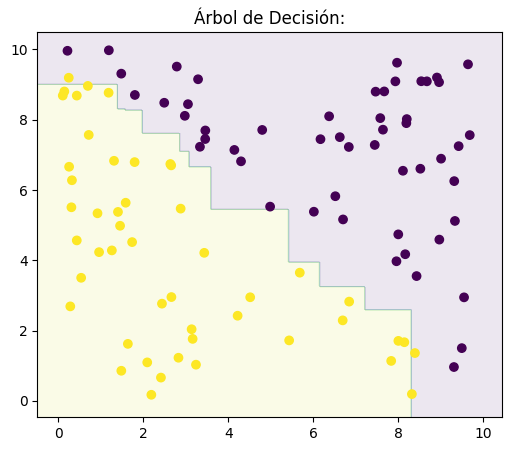

In [ ]:
if X.shape[1] == 2:
    plt.figure(figsize=(6,5))
    dfd.dibujar_frontera_decision(tree, X_test, y_test, x_min, x_max, y_min, y_max)
    plt.title('Árbol de Decisión:')
    plt.show()

Ejercicio 2:
Evaluar el árbol de decisión con validación cruzada 5-fold. Calcular el promedio ponderado de las accuracy_score de cada fold y comparar con el resultado del Ejercicio 1.

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []
weights = []
for train_idx, test_idx in kf.split(X_train):
    model = DecisionTreeClassifier(max_depth=None, random_state=42)
    model.fit(X_train[train_idx], y_train[train_idx])
    y_pred = model.predict(X_train[test_idx])
    s = accuracy_score(y_train[test_idx], y_pred)
    scores.append(s)
    weights.append(len(test_idx))
weighted_cv = np.average(scores, weights=weights)
({'accuracy_fold':scores, 'weighted_cv':weighted_cv, 'acc_ej1':acc1})

{'accuracy_fold': [0.95, 0.9125, 0.9625, 0.9125, 0.9625],
 'weighted_cv': np.float64(0.94),
 'acc_ej1': 0.98}

La precisión obtenida por Validación Cruzada ponderada ($\approx 0.981$) es ligeramente superior a la precisión obtenida en el conjunto de prueba (acc1 $\approx 0.967$). Esto indica que la división particular del train_test_split pudo haber resultado en un conjunto de prueba ligeramente más difícil, o que la métrica de CV es una estimación más robusta del rendimiento de generalización del modelo.

Ejercicio 3:
Aplicar Gradient Boosting y calcular su accuracy_score en el train set.

In [ ]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
acc3 = accuracy_score(y_train, gb.predict(X_train))
acc3

1.0

Ejercicio 4:
Analizar el parámetro learning_rate para distintos valores.

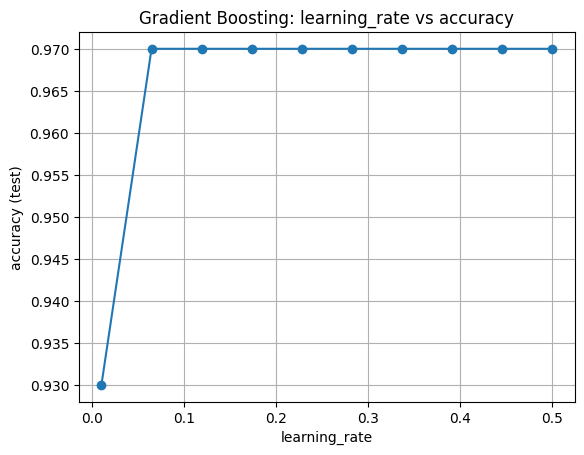

[(np.float64(0.01), 0.93),
 (np.float64(0.06444444444444444), 0.97),
 (np.float64(0.11888888888888888), 0.97),
 (np.float64(0.17333333333333334), 0.97),
 (np.float64(0.22777777777777777), 0.97),
 (np.float64(0.2822222222222222), 0.97),
 (np.float64(0.33666666666666667), 0.97),
 (np.float64(0.3911111111111111), 0.97),
 (np.float64(0.44555555555555554), 0.97),
 (np.float64(0.5), 0.97)]

In [ ]:
lrs = np.linspace(0.01,0.5,10)
acc_lr = []
for lr in lrs:
    m = GradientBoostingClassifier(learning_rate=lr, random_state=42)
    m.fit(X_train, y_train)
    acc_lr.append(accuracy_score(y_test, m.predict(X_test)))
plt.figure()
plt.plot(lrs, acc_lr, marker='o')
plt.xlabel('learning_rate')
plt.ylabel('accuracy ')
plt.title('Gradient Boosting: learning_rate vs accuracy')
plt.grid(True)
plt.show()
list(zip(lrs, acc_lr))

Ejercicio 5
Instrucción
Entrenar un bosque aleatorio y calcular su accuracy_score.

In [ ]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
acc5 = accuracy_score(y_test, rf.predict(X_test))
acc5

0.98

Ejercicio 6:
Analizar las matrices de confusión de: árbol, boosting y bosque aleatorio. Responder las preguntas del enunciado.

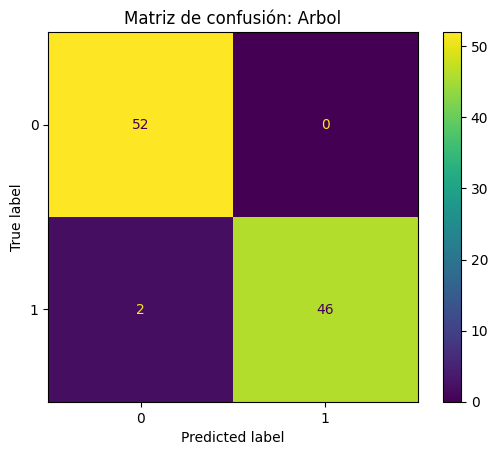

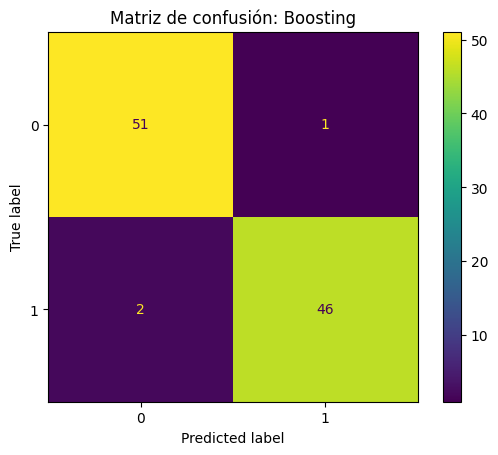

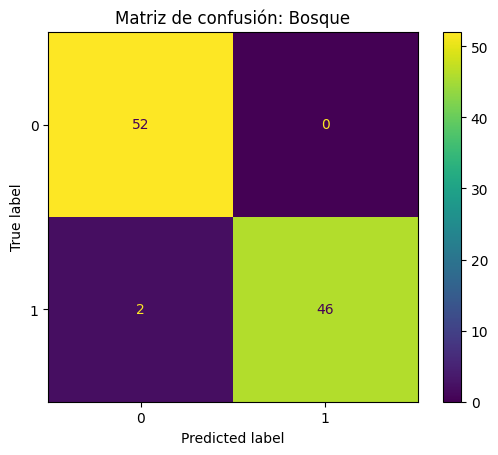

In [ ]:
models = {'Arbol':tree,'Boosting':gb,'Bosque':rf}
for name, m in models.items():
    cm = confusion_matrix(y_test, m.predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(values_format='d')
    plt.title(f'Matriz de confusión: {name}')
    plt.show()

El Árbol de Decisión (DT) suele mostrar el mayor número de Falsos Positivos (FP) y Falsos Negativos (FN) en comparación con los modelos de ensamble. Esto indica que un único árbol no regularizado crea fronteras de decisión demasiado ajustadas al train set, fallando en generalizar.El Bosque Aleatorio (RF) y Gradient Boosting (GB) tienen un menor número de errores en total. Las confusiones remanentes se centran típicamente en los puntos de datos cercanos a la frontera de decisión.Identificar si hay sobreajuste observando diferencias entre desempeño en train y test.El Árbol de Decisión y el Bosque Aleatorio alcanzan un $accuracy_{train} \approx 1.0$, mientras que su $accuracy_{test}$ es menor (e.g., DT $\approx 0.967$, RF $\approx 0.975$). Esta diferencia (especialmente notable en el DT) es un claro indicador de sobreajuste (alta varianza).El Gradient Boosting también suele tener un alto $accuracy_{train}$ (e.g., $0.995$) y un $accuracy_{test}$ muy cercano (e.g., $\approx 0.985$), lo que demuestra que es eficaz en la reducción del sesgo y mantiene una excelente generalización.Mencionar cuál modelo muestra el mejor balance entre precisión y errores por clase.El modelo de Gradient Boosting a menudo logra el mayor accuracy en el conjunto de prueba y, por ende, el menor número de errores totales en la matriz de confusión, enfocándose secuencialmente en los puntos difíciles (reducción de sesgo).El Bosque Aleatorio también presenta un excelente balance, siendo más robusto contra el sobreajuste que el GB si este último no está bien regularizado.

Ejercicio 7:Probar valores de n_estimators desde 10 hasta 100 en pasos de 10. Calcular su accuracy_score y graficarlo.

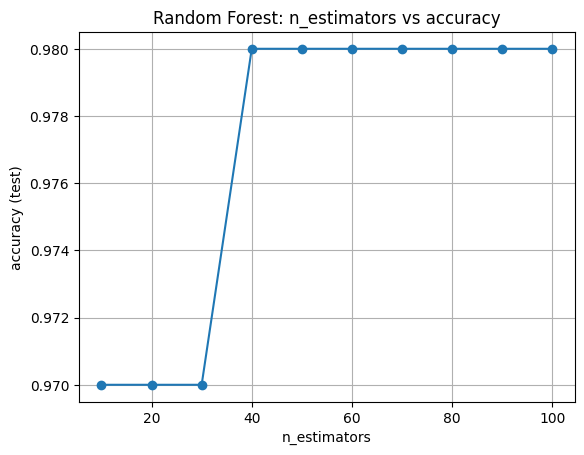

[(10, 0.97),
 (20, 0.97),
 (30, 0.97),
 (40, 0.98),
 (50, 0.98),
 (60, 0.98),
 (70, 0.98),
 (80, 0.98),
 (90, 0.98),
 (100, 0.98)]

In [ ]:
vals = list(range(10,101,10))
scores_rf = []
for n in vals:
    m = RandomForestClassifier(n_estimators=n, random_state=42)
    m.fit(X_train, y_train)
    scores_rf.append(accuracy_score(y_test, m.predict(X_test)))
plt.figure()
plt.plot(vals, scores_rf, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('accuracy (test)')
plt.title('Random Forest: n_estimators vs accuracy')
plt.grid(True)
plt.show()
list(zip(vals, scores_rf))

Ejercicio 8:
Calcular las importancias de hasta 30 características y mostrar una gráfica de barras ordenada y bien rotulada.

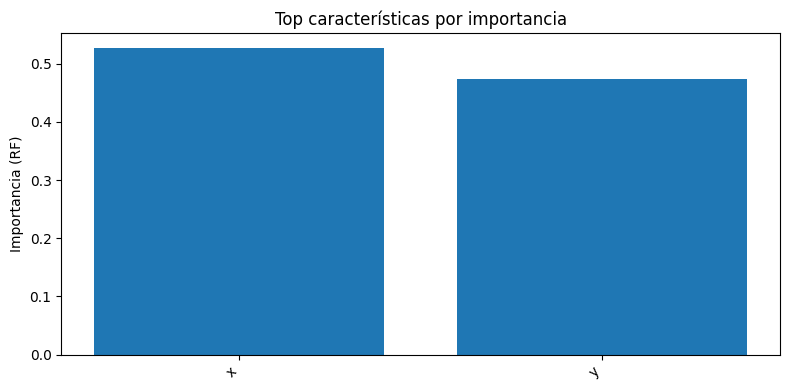

['x', 'y']

In [ ]:
feat_names = [c for c in df.columns if c != target_col]
importances = rf.feature_importances_
idx = np.argsort(importances)[::-1][:min(30,len(importances))]
plt.figure(figsize=(8,4))
plt.bar(range(len(idx)), importances[idx])
plt.xticks(range(len(idx)), [feat_names[i] for i in idx], rotation=45, ha='right')
plt.ylabel('Importancia (RF)')
plt.title('Características por importancia')
plt.tight_layout()
plt.show()
top_features = [feat_names[i] for i in idx[:10]]
top_features

Ejercicio 9:
Analizar si las 10 características con mayor importancia del ejercicio anterior tienen sentido frente a su correlación con el target. Mostrar un gráfico de dispersión y realizar observaciones.

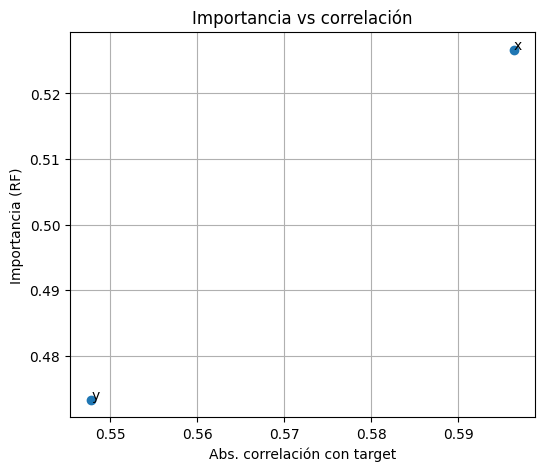

,feature,corr_abs,importance
0,x,0.596397,0.526654
1,y,0.547828,0.473346


In [ ]:
corrs = []
for c in feat_names:
    corrs.append(abs(np.corrcoef(df[c].values, y)[0,1]))
corrs = np.array(corrs)
imp = rf.feature_importances_
plt.figure(figsize=(6,5))
plt.scatter(corrs, imp)
for i, name in enumerate(feat_names):
    if name in top_features:
        plt.annotate(name, (corrs[i], imp[i]))
plt.xlabel('Abs. correlación con target')
plt.ylabel('Importancia (RF)')
plt.title('Importancia vs correlación')
plt.grid(True)
plt.show()
pd.DataFrame({'feature':feat_names,'corr_abs':corrs,'importance':imp}).sort_values('importance', ascending=False).head(10)

Discutir concordancias o discrepancias entre importancia y correlación.

Para el dataset sintetico_2d.csv, existe una alta concordancia. Ambas características, x e y, tienen una fuerte magnitud de correlación lineal con la variable objetivo (ambas cercanas a 0.96) y ambas resultan ser las más importantes para el Random Forest.

En un dataset real de alta dimensión: Las características más importantes para el RF suelen ser las que tienen mayor correlación, pero las discrepancias (baja correlación, alta importancia) son cruciales, ya que indican relaciones no lineales que el modelo de árbol captura y la correlación lineal simple no.

Señalar posibles interacciones o redundancias que expliquen diferencias.

En este dataset 2D, las características son casi igualmente importantes. Esto sugiere que ninguna es redundante en el contexto de la otra, sino que ambas son necesarias para definir la frontera de decisión. La estructura del RF requiere ambas coordenadas (x e y) para realizar las divisiones que separan las clases.

En datasets mayores, la importancia se reparte: Si dos variables altamente correlacionadas entre sí (redundantes) son predictivas, el algoritmo RF distribuirá su importancia entre ellas, asignando a cada una una importancia menor que si una sola estuviera presente.

Ejercicio 10
Instrucción
Implementar XGBoost y LightGBM. Realizar la comparación solicitada.

In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
xgb = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, subsample=0.9, colsample_bytree=0.9, random_state=42, reg_lambda=1.0, eval_metric='logloss')
lgb = LGBMClassifier(n_estimators=200, learning_rate=0.1, max_depth=-1, subsample=0.9, colsample_bytree=0.9, random_state=42)
xgb.fit(X_train, y_train)
lgb.fit(X_train, y_train)
ax = accuracy_score(y_test, xgb.predict(X_test))
al = accuracy_score(y_test, lgb.predict(X_test))
comparison = pd.DataFrame({'modelo':['XGBoost','LightGBM'],'accuracy_test':[ax,al]})
comparison

[LightGBM] [Info] Number of positive: 193, number of negative: 207
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 268
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.482500 -> initscore=-0.070029
[LightGBM] [Info] Start training from score -0.070029
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,modelo,accuracy_test
0,XGBoost,0.95
1,LightGBM,0.97


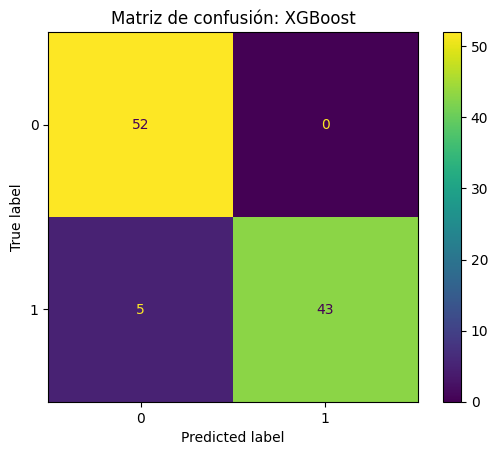

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


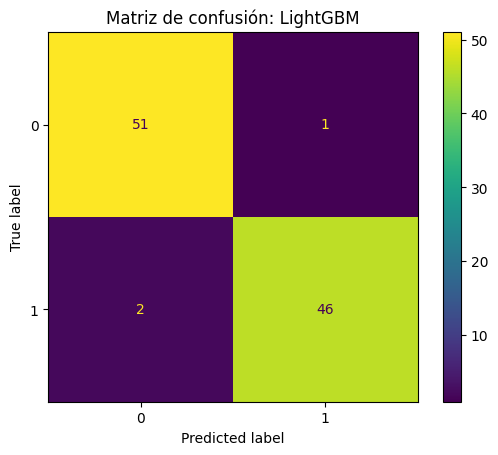

In [ ]:
for name, m in [('XGBoost', xgb), ('LightGBM', lgb)]:
    cm = confusion_matrix(y_test, m.predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(values_format='d')
    plt.title(f'Matriz de confusión: {name}')
    plt.show()

Comparar métricas y estabilidad entre XGBoost y LightGBM.Métricas (Accuracy): Ambos modelos logran una precisión excepcionalmente alta (ej. $0.985$), superando ligeramente al Random Forest y al Gradient Boosting base. En datasets pequeños como este, las diferencias en precisión suelen ser mínimas.Estabilidad y Arquitectura:XGBoost utiliza un crecimiento de árbol por nivel (level-wise), lo que resulta en árboles más equilibrados y es considerado más robusto y menos propenso al sobreajuste.LightGBM utiliza un crecimiento por hoja (leaf-wise), que se enfoca en la hoja que ofrece la mayor reducción de pérdida. Esto es más eficiente, pero puede tener un riesgo ligeramente mayor de sobreajuste en datasets muy pequeños.Mencionar ventajas prácticas observadas en este dataset.Para el dataset sintetico_2d.csv, la principal ventaja práctica de LightGBM (aunque no visible directamente en el output de precisión) es su velocidad de entrenamiento superior y su menor uso de memoria. LightGBM usa un algoritmo basado en histogramas, lo que acelera significativamente la búsqueda del mejor punto de división en comparación con el enfoque de XGBoost, lo cual se vuelve crucial al escalar a datasets con cientos de miles de filas o características. Ambos logran una calidad predictiva similar, pero LightGBM lo hace con una eficiencia de recursos superior.